In [1]:
!wget https://itriaihub.blob.core.windows.net/github-download-resources/repository/ITRI-AI-Hub/datasets/HardHat_Dataset.YOLO.zip
!unzip HardHat_Dataset.YOLO.zip

--2024-11-06 09:02:51--  https://itriaihub.blob.core.windows.net/github-download-resources/repository/ITRI-AI-Hub/datasets/HardHat_Dataset.YOLO.zip
Resolving itriaihub.blob.core.windows.net (itriaihub.blob.core.windows.net)... 20.209.42.36
Connecting to itriaihub.blob.core.windows.net (itriaihub.blob.core.windows.net)|20.209.42.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3705720 (3.5M) [application/x-zip-compressed]
Saving to: ‘HardHat_Dataset.YOLO.zip’

HardHat_Dataset.YOL 100%[===================>]   3.53M  1.05MB/s    in 3.4s    

2024-11-06 09:02:55 (1.05 MB/s) - ‘HardHat_Dataset.YOLO.zip’ saved [3705720/3705720]

Archive:  HardHat_Dataset.YOLO.zip
   creating: HardHat_Dataset.YOLO/
  inflating: HardHat_Dataset.YOLO/data.yaml  
  inflating: HardHat_Dataset.YOLO/README.roboflow.txt  
   creating: HardHat_Dataset.YOLO/test/
   creating: HardHat_Dataset.YOLO/test/images/
  inflating: HardHat_Dataset.YOLO/test/images/000008_jpg.rf.8ddEpaD8kjf9Wwgm1P3I.j

In [2]:
#optional
!git clone https://github.com/R300-AI/AutoAugment.git
!pip install -r AutoAugment/requirements.txt

Cloning into 'AutoAugment'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 66 (delta 17), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 27.71 KiB | 1.98 MiB/s, done.
Resolving deltas: 100% (17/17), done.


https://huggingface.co/spaces/qubvel-hf/albumentations-demo

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


summary the samples...
process each samples limited to 0.8571428571428571 seconds.


100%|██████████| 70/70 [04:25<00:00,  3.79s/it]


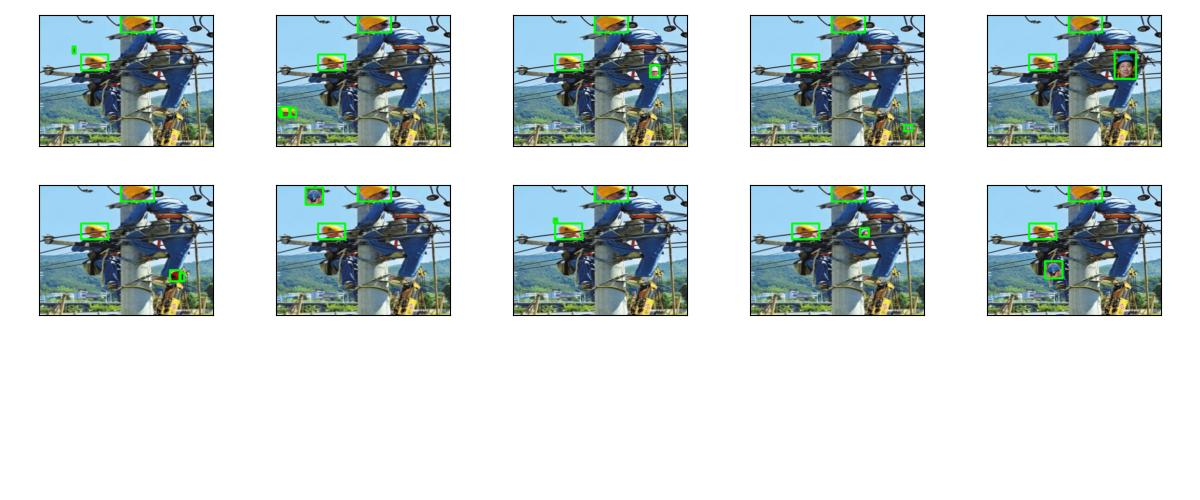

In [3]:
from AutoAugment.augmentors import ObjectAugmentor
from IPython.display import display, Image
import albumentations as A
import warnings, os

warnings.simplefilter("ignore")

augmentor = ObjectAugmentor(maximum_size = 16, maximum_process_second = 60)
NEW_DATASET_PATH = augmentor.fit('/content/HardHat_Dataset.YOLO', [A.Blur(p=0.8), A.CLAHE(p=0.8), A.GaussNoise(p=0.8), A.HorizontalFlip(p=0.5), A.PixelDropout(p=0.8),
                                      A.RandomBrightnessContrast(p=0.9), A.RandomShadow(p=0.8, shadow_intensity_range=(0.6, 0.9)),
                                      A.BBoxSafeRandomCrop(p=.7), A.ColorJitter(p=.8)] , save=True, verbose=True)

log = os.listdir(f"{NEW_DATASET_PATH}/log")[-1]
display(Image(filename=f"{NEW_DATASET_PATH}/log/{log}"))

In [4]:
!pip install ultralytics
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 15.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 56.5MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
results = model.train(data='/content/HardHat_Dataset.YOLO/data.yaml', epochs=100)
results.results_dict

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/HardHat_Dataset.YOLO/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 10.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/HardHat_Dataset.YOLO/train/labels... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<00:00, 1146.49it/s]

train: New cache created: /content/HardHat_Dataset.YOLO/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/HardHat_Dataset.YOLO/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 710.16it/s]

val: New cache created: /content/HardHat_Dataset.YOLO/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.871      4.066      1.553         57        640: 100%|██████████| 5/5 [01:02<00:00, 12.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.01s/it]

                   all         20         65     0.0023      0.463    0.00663     0.0032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.571      3.746      1.333         35        640: 100%|██████████| 5/5 [00:56<00:00, 11.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.51s/it]

                   all         20         65    0.00334      0.541     0.0625     0.0386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.558      2.897      1.191         50        640: 100%|██████████| 5/5 [00:56<00:00, 11.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.46s/it]

                   all         20         65     0.0047      0.581     0.0972     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.355      1.938      1.141         30        640: 100%|██████████| 5/5 [00:55<00:00, 11.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]

                   all         20         65     0.0109      0.767      0.211      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.432      1.829      1.168         49        640: 100%|██████████| 5/5 [00:55<00:00, 11.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.50s/it]

                   all         20         65     0.0126       0.93      0.286      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.388      1.752      1.099         39        640: 100%|██████████| 5/5 [00:53<00:00, 10.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.15s/it]

                   all         20         65     0.0128      0.933      0.294      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G       1.37      1.711      1.119         37        640: 100%|██████████| 5/5 [00:56<00:00, 11.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.39s/it]

                   all         20         65     0.0125      0.952      0.376      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.349      1.576      1.109         30        640: 100%|██████████| 5/5 [00:55<00:00, 11.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]

                   all         20         65      0.995     0.0444      0.346      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.295      1.624      1.067         28        640: 100%|██████████| 5/5 [00:55<00:00, 11.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]

                   all         20         65      0.957     0.0502      0.327      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.307      1.395       1.09         36        640: 100%|██████████| 5/5 [00:54<00:00, 10.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.02s/it]

                   all         20         65      0.962     0.0444      0.358      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.296      1.397      1.099         26        640: 100%|██████████| 5/5 [00:55<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.67s/it]

                   all         20         65          1     0.0287      0.348      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.403      1.435      1.138         57        640: 100%|██████████| 5/5 [00:55<00:00, 11.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.50s/it]

                   all         20         65      0.949     0.0417      0.264       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.296      1.325        1.1         51        640: 100%|██████████| 5/5 [00:54<00:00, 10.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]

                   all         20         65      0.923     0.0493      0.359      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.313      1.332      1.095         56        640: 100%|██████████| 5/5 [00:57<00:00, 11.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.49s/it]

                   all         20         65      0.939       0.17      0.536      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.264      1.388      1.132         38        640: 100%|██████████| 5/5 [00:54<00:00, 10.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.08s/it]

                   all         20         65      0.978      0.231       0.54      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.251      1.199      1.095         26        640: 100%|██████████| 5/5 [00:53<00:00, 10.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.22s/it]

                   all         20         65          1      0.355      0.584      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.295      1.217      1.131         39        640: 100%|██████████| 5/5 [00:55<00:00, 11.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.14s/it]

                   all         20         65      0.925      0.402      0.528      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.301      1.177      1.118         41        640: 100%|██████████| 5/5 [00:56<00:00, 11.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.50s/it]

                   all         20         65        0.9      0.459      0.539      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.184      1.105      1.086         26        640: 100%|██████████| 5/5 [00:53<00:00, 10.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.19s/it]

                   all         20         65      0.878      0.456      0.549       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.137      1.103      1.082         28        640: 100%|██████████| 5/5 [00:55<00:00, 11.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.56s/it]

                   all         20         65      0.905      0.385      0.572      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G       1.21      1.124      1.038         40        640: 100%|██████████| 5/5 [00:53<00:00, 10.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.15s/it]

                   all         20         65      0.908      0.385      0.578      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.148      1.085      1.036         27        640: 100%|██████████| 5/5 [00:56<00:00, 11.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.20s/it]

                   all         20         65       0.58      0.469        0.6      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.127      1.077      1.012         38        640: 100%|██████████| 5/5 [00:54<00:00, 10.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.41s/it]

                   all         20         65      0.586      0.509        0.6       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.129      1.011      1.031         46        640: 100%|██████████| 5/5 [00:54<00:00, 10.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.14s/it]

                   all         20         65      0.504      0.558      0.588      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G       1.06      1.066      1.052         45        640: 100%|██████████| 5/5 [00:56<00:00, 11.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.57s/it]

                   all         20         65      0.511      0.533      0.572      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      1.099      1.094       1.02         27        640: 100%|██████████| 5/5 [00:54<00:00, 10.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.10s/it]

                   all         20         65      0.494      0.481      0.554      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.118      1.065      1.056         40        640: 100%|██████████| 5/5 [00:56<00:00, 11.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]

                   all         20         65      0.485      0.508      0.556      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.075      1.016      1.017         16        640: 100%|██████████| 5/5 [00:54<00:00, 10.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.13s/it]

                   all         20         65      0.399      0.486      0.528      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      1.122     0.9789      1.019         32        640: 100%|██████████| 5/5 [00:56<00:00, 11.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.49s/it]

                   all         20         65      0.429      0.407      0.512      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.026     0.9324      1.026         26        640: 100%|██████████| 5/5 [00:55<00:00, 11.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.24s/it]

                   all         20         65      0.571      0.407      0.565      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.076     0.9892      1.018         19        640: 100%|██████████| 5/5 [00:55<00:00, 11.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.52s/it]

                   all         20         65      0.572      0.407      0.561      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      1.095     0.9535      1.023         43        640: 100%|██████████| 5/5 [00:54<00:00, 10.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.46s/it]

                   all         20         65      0.506      0.494      0.544      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.026     0.9022      1.041         25        640: 100%|██████████| 5/5 [00:54<00:00, 10.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.12s/it]

                   all         20         65      0.506      0.552      0.558      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.006     0.8584      1.008         64        640: 100%|██████████| 5/5 [00:53<00:00, 10.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.21s/it]

                   all         20         65      0.501      0.537      0.559      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.031     0.9001      1.018         42        640: 100%|██████████| 5/5 [00:54<00:00, 10.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.08s/it]

                   all         20         65      0.492      0.522       0.57       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      1.025     0.8966      1.017         32        640: 100%|██████████| 5/5 [00:54<00:00, 10.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.36s/it]

                   all         20         65      0.528      0.512      0.554      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.056      0.901      1.028         50        640: 100%|██████████| 5/5 [00:55<00:00, 11.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.09s/it]

                   all         20         65      0.881      0.496      0.548      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.9919      0.867     0.9762         49        640: 100%|██████████| 5/5 [00:59<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.41s/it]

                   all         20         65      0.869      0.533       0.57      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.059       0.88      1.019         26        640: 100%|██████████| 5/5 [00:55<00:00, 11.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.12s/it]

                   all         20         65      0.896      0.522      0.585      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G       1.01     0.7913     0.9756         55        640: 100%|██████████| 5/5 [00:55<00:00, 11.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.45s/it]

                   all         20         65      0.853      0.589      0.609      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G       1.03     0.8317     0.9978         32        640: 100%|██████████| 5/5 [00:54<00:00, 10.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.05s/it]

                   all         20         65      0.916      0.579      0.634      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.012     0.8377      1.004         22        640: 100%|██████████| 5/5 [00:56<00:00, 11.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.66s/it]

                   all         20         65      0.588      0.602      0.648      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      1.086     0.8592      1.001         52        640: 100%|██████████| 5/5 [00:52<00:00, 10.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.19s/it]

                   all         20         65      0.602        0.6      0.648      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.9639     0.7921     0.9648         44        640: 100%|██████████| 5/5 [00:54<00:00, 10.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.02s/it]

                   all         20         65      0.544      0.595      0.636      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.9979     0.7985     0.9975         34        640: 100%|██████████| 5/5 [00:54<00:00, 11.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.36s/it]

                   all         20         65      0.517      0.589      0.632      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      1.022     0.8106     0.9934         49        640: 100%|██████████| 5/5 [00:53<00:00, 10.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.27s/it]

                   all         20         65      0.539      0.564      0.632       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      0.968     0.7902     0.9665         34        640: 100%|██████████| 5/5 [00:56<00:00, 11.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.40s/it]

                   all         20         65      0.559      0.543      0.632      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      1.039     0.8293     0.9954         42        640: 100%|██████████| 5/5 [00:54<00:00, 10.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  6.00s/it]

                   all         20         65      0.568      0.561      0.624      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.9652     0.7812     0.9993         30        640: 100%|██████████| 5/5 [00:54<00:00, 10.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.09s/it]

                   all         20         65      0.554      0.544      0.619      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.9053     0.7162     0.9402         39        640: 100%|██████████| 5/5 [00:54<00:00, 10.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.08s/it]

                   all         20         65       0.61      0.526      0.619      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.9257     0.7124     0.9501         60        640: 100%|██████████| 5/5 [00:54<00:00, 10.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]

                   all         20         65      0.594      0.554      0.627      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.8834     0.7083     0.9588         36        640: 100%|██████████| 5/5 [00:56<00:00, 11.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.12s/it]

                   all         20         65      0.554      0.531      0.618      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.9133     0.7892     0.9678         26        640: 100%|██████████| 5/5 [00:54<00:00, 10.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]

                   all         20         65      0.558      0.547      0.614      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.8673     0.7331     0.9394         27        640: 100%|██████████| 5/5 [00:54<00:00, 10.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]

                   all         20         65      0.557      0.576       0.62      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.8788     0.7495     0.9473         52        640: 100%|██████████| 5/5 [00:54<00:00, 10.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.07s/it]

                   all         20         65      0.582      0.583      0.627      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.8127     0.7051     0.9455         41        640: 100%|██████████| 5/5 [00:54<00:00, 10.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  5.00s/it]

                   all         20         65      0.637      0.578      0.629      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      0.865     0.7241     0.9387         38        640: 100%|██████████| 5/5 [00:55<00:00, 11.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.31s/it]

                   all         20         65      0.644      0.574      0.631      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.8534     0.7114     0.9418         50        640: 100%|██████████| 5/5 [00:52<00:00, 10.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.06s/it]

                   all         20         65      0.609        0.6      0.634      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.8317     0.7056     0.9292         53        640: 100%|██████████| 5/5 [00:54<00:00, 10.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.01s/it]

                   all         20         65      0.608      0.598      0.638       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.8674     0.6922     0.9278         50        640: 100%|██████████| 5/5 [00:53<00:00, 10.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.09s/it]

                   all         20         65      0.946      0.637      0.635      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.8253     0.6609     0.9093         36        640: 100%|██████████| 5/5 [00:53<00:00, 10.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.98s/it]

                   all         20         65      0.958      0.628      0.631      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      0.827     0.6629     0.9208         62        640: 100%|██████████| 5/5 [00:55<00:00, 11.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.74s/it]

                   all         20         65      0.605      0.633       0.63      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.7921     0.6479     0.9175         43        640: 100%|██████████| 5/5 [00:52<00:00, 10.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.85s/it]

                   all         20         65      0.604      0.629      0.632      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.8051     0.6817     0.9287         19        640: 100%|██████████| 5/5 [00:53<00:00, 10.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.98s/it]

                   all         20         65      0.627      0.594      0.638      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.8128      0.636     0.9437         53        640: 100%|██████████| 5/5 [00:54<00:00, 10.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.31s/it]

                   all         20         65      0.656      0.575      0.643      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.7903     0.6654     0.9376         26        640: 100%|██████████| 5/5 [00:53<00:00, 10.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.27s/it]

                   all         20         65      0.652      0.578      0.644      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.7941     0.6518     0.9188         58        640: 100%|██████████| 5/5 [00:56<00:00, 11.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.08s/it]

                   all         20         65      0.582      0.626      0.649      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.7594     0.6303     0.9176        103        640:  60%|██████    | 3/5 [00:36<00:24, 12.37s/it]

In [ ]:
results.results_dict